In [14]:
from nn import Layer, NN
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn import datasets    # Solo lo usamos para obtener los datos
digits = datasets.load_digits()

Como primera verificación vemos que los targets estan correctamente asociados.

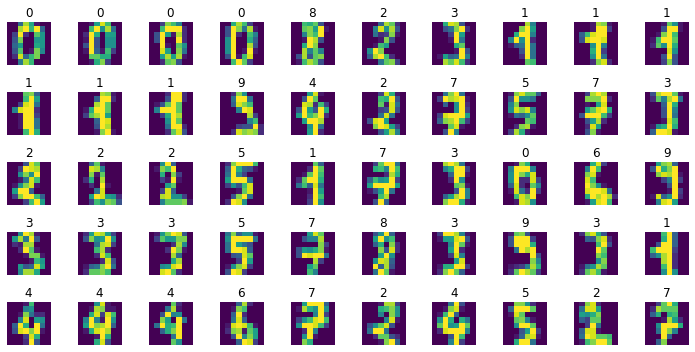

In [45]:
fig, ax = plt.subplots(5, 10, figsize=(10, 5))

for i in range(5):
    for j in range(10):
        ax[i, j].imshow(digits.data[10* j + i].reshape(8, 8))
        ax[i, j].set_title(digits.target[10 * j + i])
        ax[i, j].axis("off")

plt.tight_layout()
plt.show()

Luego separamos en conjuntos de entrenamiento y validación para tener un punto común de comparación entre diferentes variantes estudiadas.

Como los targets tienen la forma $\{0, 1, 2, ..., 9\}$ los transformaremos en un vector de 10 filas donde cada fila corresponda a cada digito (one-hot encoding).

In [60]:
from sklearn.model_selection import train_test_split

target = np.zeros((digits.target.shape[0], 10))
for i, t in enumerate(digits.target):
    target[i, t] = 1

x_train, x_test, y_train, y_test = train_test_split(
    digits.data, target, test_size=0.5, shuffle=False
)

# Intento 1

In [ ]:
l1 = Layer(x_train.shape[-1], 32)
l2 = Layer(32, 32)
l3 = Layer(32, y_train.shape[-1])

nn = NN([l1, l2, l3])
nn.train(x_train, y_train, epochs=1000, learning_rate=0.01)

y_hat = [nn.forward(x) for x in x_test]

In [ ]:
for yi, yi_hat in zip(y_test, y_hat):
    print(yi, yi_hat)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [0.99999975 0.99999994 0.99999998 0.99999999 0.99999999 0.99999997
 0.99999966 0.99999996 0.99999997 0.99999999]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [0.99999975 0.99999994 0.99999998 0.99999999 0.99999999 0.99999997
 0.99999966 0.99999996 0.99999997 0.99999999]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [0.99999975 0.99999994 0.99999998 0.99999999 0.99999999 0.99999997
 0.99999966 0.99999996 0.99999997 0.99999999]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [0.99999975 0.99999994 0.99999998 0.99999999 0.99999999 0.99999997
 0.99999966 0.99999996 0.99999997 0.99999999]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0.99999975 0.99999994 0.99999998 0.99999999 0.99999999 0.99999997
 0.99999966 0.99999996 0.99999997 0.99999999]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [0.99999975 0.99999994 0.99999998 0.99999999 0.99999999 0.99999997
 0.99999966 0.99999996 0.99999997 0.99999999]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [0.99999975 0.99999994 0.99999998 0.99999999 0.99999999 0.99999997
 0.99999966 0.99999996 0.999999